In [7]:
import pandas as pd

In [9]:
ls

Applications/
Assignment 1.ipynb
Desktop/
Documents/
Downloads/
ForLoops.ipynb
Library/
Lists, Tuples, Dictionaries, Booleans, Sets.ipynb
Movies/
Music/
NumPy use.ipynb
Pandas.ipynb
Pictures/
Public/
PycharmProjects/
Python Crash Course.ipynb
RDKit - Drug Design.ipynb
ScigressUser/
Untitled.ipynb
Untitled1.ipynb
my_new_file.txt
myfile.txt
ndsgahhsbb.txt
opt/
tips.csv


In [10]:
cd Desktop/

/Users/toobaiqbal/Desktop


In [65]:
solubility = pd.read_csv('delaney.csv')
solubility

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [66]:
solubility.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [67]:
solubility.SMILES[1]

'CC(Cl)(Cl)Cl'

In [14]:
from rdkit import Chem

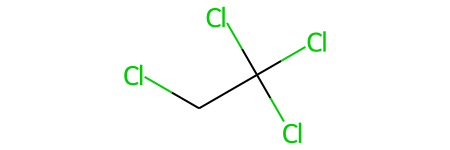

In [69]:
sol1 = Chem.MolFromSmiles(sol.SMILES[0])
sol1

# Calculate Molecular Descriptors

In [18]:
mol_list= []
for element in sol.SMILES:
  mol = Chem.MolFromSmiles(element)
  mol_list.append(mol)

In [19]:
len(mol_list)

1144

In [20]:
mol_list[:5]

In [21]:
import numpy as np
from rdkit.Chem import Descriptors

In [122]:
def generate_descrip(smiles_delaney,):

    moldata = []
    for elem in smiles_delaney:
        mol = Chem.MolFromSmiles(elem) 
        moldata.append(mol)
    
    columnNames = ["MolLogP","MolWt","NumRotatableBonds"] 
    
    main_data = np.arange(1,1)
    i=0
    for mol in moldata:  
       
        descrip_MolLogP = Descriptors.MolLogP(mol)
        descrip_MolWt = Descriptors.MolWt(mol)
        descrip_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([descrip_MolLogP,
                        descrip_MolWt,
                        descrip_NumRotatableBonds])   
        
        if(i==0):
            main_data = row
        else:
            main_data = np.vstack([main_data, row])
        i = i+1 
    
    descriptors = pd.DataFrame(data=main_data,columns=columnNames)

    return descriptors

In [127]:
df = generate_descrip(solubility.SMILES)
df.head()

,MolLogP,MolWt,NumRotatableBonds
0,2.5954,167.850,0.0
1,2.3765,133.405,0.0
2,2.5938,167.850,1.0
3,2.0289,133.405,1.0
4,2.9189,187.375,1.0
